<a href="https://colab.research.google.com/github/hugueds/tensorflow-course/blob/master/88_Multivariate_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multivariate Time Series

In [1]:
%tensorflow_version 2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
raw_df = pd.read_csv('energydata_complete.csv', index_col='date', infer_datetime_format=True)

In [3]:
raw_df.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [4]:
raw_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null fl

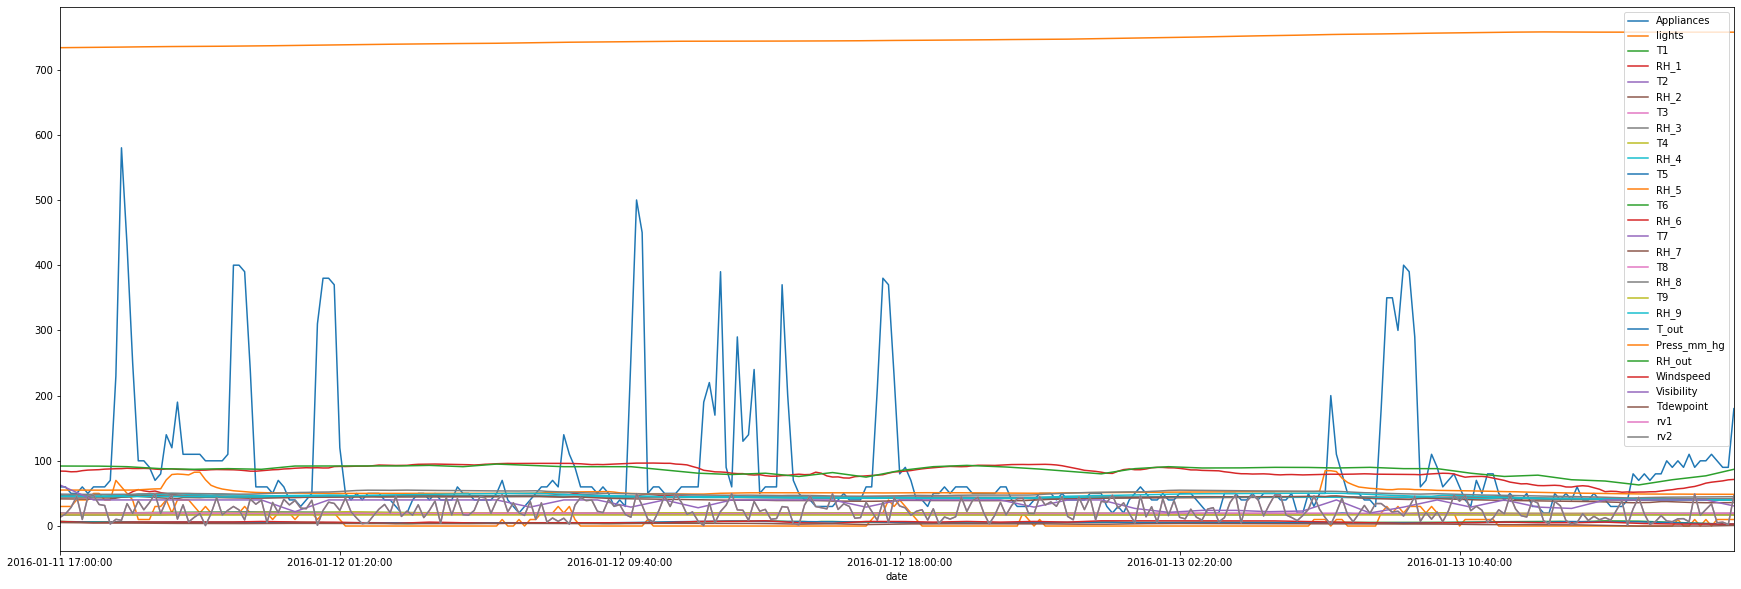

In [6]:
raw_df[:300].plot(figsize=(30,10))

In [0]:
lenght = len(raw_df)

In [8]:
raw_df.loc['2016-05-01':]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.200000,18.390000,41.400000,23.200000,36.400000,19.73,37.730000,19.50,47.290000,4.800000,40.060000,19.500000,31.600000,22.2000,40.000000,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.172500,18.390000,41.500000,23.133333,36.466667,19.70,37.663333,19.50,47.290000,4.800000,40.090000,19.500000,31.600000,22.2000,40.400000,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.090000,18.323333,41.500000,23.200000,36.500000,19.70,37.590000,19.50,47.260000,4.660000,40.030000,19.500000,31.600000,22.2000,41.000000,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.090000,18.290000,41.500000,23.200000,36.500000,19.70,37.500000,19.50,47.260000,4.530000,41.300000,19.500000,31.600000,22.2000,41.333333,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.030000,18.290000,41.560000,23.200000,36.500000,19.70,37.500000,19.50,47.200000,4.590000,41.833333,19.500000,31.600000,22.2000,41.626667,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,45.590000,23.20,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,45.590000,23.23,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.70,45.730000,23.23,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [0]:
df = raw_df.loc['2016-05-01':].round(2)

In [10]:
lenght = len(df)
lenght

3853

In [0]:
# grab 1 day
rows_per_day = 24 * 60 / 10

In [12]:
test_days = 2
test_index = int(test_days * rows_per_day)
test_index

288

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3853 entries, 2016-05-01 00:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
Appliances     3853 non-null int64
lights         3853 non-null int64
T1             3853 non-null float64
RH_1           3853 non-null float64
T2             3853 non-null float64
RH_2           3853 non-null float64
T3             3853 non-null float64
RH_3           3853 non-null float64
T4             3853 non-null float64
RH_4           3853 non-null float64
T5             3853 non-null float64
RH_5           3853 non-null float64
T6             3853 non-null float64
RH_6           3853 non-null float64
T7             3853 non-null float64
RH_7           3853 non-null float64
T8             3853 non-null float64
RH_8           3853 non-null float64
T9             3853 non-null float64
RH_9           3853 non-null float64
T_out          3853 non-null float64
Press_mm_hg    3853 non-null float64
RH_out         3853 non-null float64
Windspeed      385

In [0]:
train = df.iloc[:-test_index]
test = df.iloc[-test_index:]

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
lenght = 144 # one day
length = lenght
n_features = scaled_train.shape[1]
batch_size = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, batch_size=batch_size, length=lenght)
val_generator = TimeseriesGenerator(scaled_test, scaled_test, batch_size=batch_size, length=lenght)

In [47]:
scaled_train.shape

(3565, 28)

In [0]:
model = Sequential()

In [0]:
model.add(LSTM(50, input_shape=[lenght, scaled_train.shape[1]]))
model.add(Dense(scaled_train.shape[1]))
model.compile(optimizer='adam', loss='mse')

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                15800     
_________________________________________________________________
dense_1 (Dense)              (None, 28)                1428      
Total params: 17,228
Trainable params: 17,228
Non-trainable params: 0
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='val_loss', patience=2)

In [53]:
model.fit_generator(generator, epochs=2, validation_data=val_generator, callbacks=[es])

3421/3421 [==============================] - 198s 58ms/step - loss: 0.0132 - val_loss: 0.0124
Epoch 2/2
3421/3421 [==============================] - 178s 52ms/step - loss: 0.0083 - val_loss: 0.0097


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3421 steps, validate for 144 steps
Epoch 1/2
3421/3421 [==============================] - 178s 52ms/step - loss: 0.0076 - val_loss: 0.0085
Epoch 2/2
3421/3421 [==============================] - 177s 52ms/step - loss: 0.0074 - val_loss: 0.0083


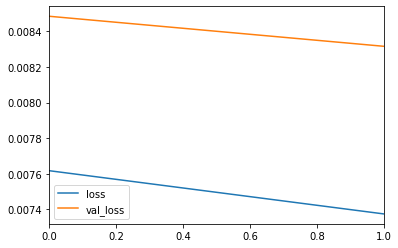

In [54]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [0]:
n_features = scaled_train.shape[1]

test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]
  test_pred.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [0]:
true_p = scaler.inverse_transform(test_pred)
true_p = pd.DataFrame(data=true_p, columns=test.columns)

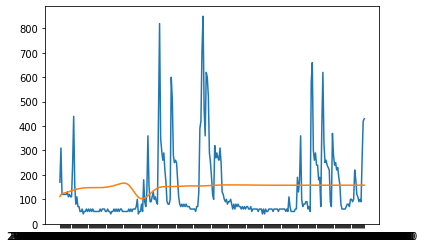

In [57]:
plt.plot(test['Appliances'])
plt.plot(true_p['Appliances'])